## Implementação do MLP para classificar tipo de flores

3) Parte 2: MLP. 

Usar uma MLP e treiná-la, usando o skcit-learn, com a base de dados Iris original (a mesma base usada na atividade, do kNN, com a mesma separação do conjunto original em conjunto de treinamento e conjunto de teste que vocês usaram na atividade do kNN). Treinar na base de treinamento e testar na base de testes. Varia o número de neurônios na camada escondida. Testar com 1, 3, 5 e 10 neurônios na camada escondida. Colocar os resultados em uma tabela. Comparar também com os resultados obtidos anteriormente com o kNN.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import warnings

dfCollumns = ['sepal length','sepal width', 'petal length', 'petal width','class']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

### Funcções auxiliares que serão usadas na execução

In [2]:
def calculateDivision(len):
    trainSize = round(0.75*len)
    testSize = len - trainSize
    return trainSize, testSize

def getTrainTestData(df):
    dfLen = len(df.index)
    trainSize, testSize = calculateDivision(dfLen)
    
    trainDf = df[0:trainSize-1].reset_index(drop = True)
    testDf = df[trainSize:dfLen].reset_index(drop = True)
    
    return trainDf, testDf

def getXY(df, dfCollumns):
    dfx = df[dfCollumns[0:len(dfCollumns) - 1]]
    dfy = df[[dfCollumns[-1]]]
    
    return dfx, dfy

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

### Criando dataframe com os dados da base de dados

In [3]:
df = pd.read_csv('Data/iris.data', sep=",", names=dfCollumns)
df = df.sample(frac=1).reset_index(drop=True)

### Dividindo dataframe em teste e treino

In [4]:
train, test = getTrainTestData(df)

trainX, trainY = getXY(train, dfCollumns)
testX, testY = getXY(test, dfCollumns)

### Execução do teste para todos os K selecionados

In [5]:
warnings.filterwarnings("ignore")

neuronList = [1, 3, 5, 10]

for x in neuronList:
    mlp = MLPClassifier(hidden_layer_sizes = x, 
                               max_iter = 1000,
                               activation = 'relu',
                               solver = 'adam',
                               random_state = 1)
    mlp.fit(trainX, trainY)
    y_pred = mlp.predict(testX)

    cm = confusion_matrix(y_pred, testY)

    print("Acurácia do MLP para " + str(x) + " neurônios na camada escondida:",accuracy(cm))

Acurácia do MLP para 1 neurônios na camada escondida: 0.34210526315789475
Acurácia do MLP para 3 neurônios na camada escondida: 0.34210526315789475
Acurácia do MLP para 5 neurônios na camada escondida: 0.9210526315789473
Acurácia do MLP para 10 neurônios na camada escondida: 0.9473684210526315


Automatically created module for IPython interactive environment


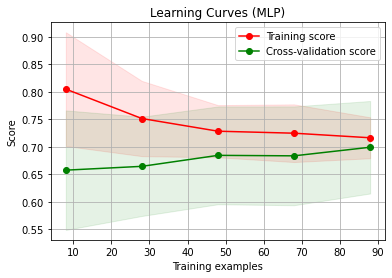

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (MLP)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = MLPClassifier(hidden_layer_sizes = 10, 
                               max_iter = 100,
                               activation = 'relu',
                               solver = 'adam',
                               random_state = 1)

plot_learning_curve(estimator, title, trainX, trainY, n_jobs=4, cv=cv)

plt.show()